<a href="https://colab.research.google.com/github/adrianbarrenada/APRENDIZAJE_AUTOMATICO_23_24/blob/main/PRROipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import cv2
import time
import urllib.request

Descargamos un conjunto de datos de Kaggle:

In [ ]:
api_token = {"username":"juliahernndezquintas","key":"a36e1c000b9dfca556f670ebce90a9f5"}

!rm -rf /root/.kaggle.
!mkdir /root/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
import json
with open('/root/.kaggle/kaggle.json','w') as file:
  json.dump(api_token,file)

# Descargamos nuestra base de datos:
!kaggle datasets download -d dhruvildave/english-handwritten-characters-dataset

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
  0% 0.00/13.1M [00:00<?, ?B/s]
100% 13.1M/13.1M [00:00<00:00, 180MB/s]


In [ ]:
import zipfile
archivo_zip="/content/english-handwritten-characters-dataset.zip"

 Descomprimimos el archivo ZIP:

In [ ]:
archivo_zip ='/content/english-handwritten-characters-dataset.zip'
extract_to_path='/content/basededatos'

with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
  zip_ref.extractall(extract_to_path)


Abrimos el archivo `english.csv` y lo cargamos `df`. Imprimimos los seis primeros registros para ver qué aspecto tienen.

In [ ]:
import glob
import pandas as pd

# Después de descomprimir los archivos como has mostrado anteriormente...

# Lista de rutas de imagen extraídas
imgs = glob.glob('/content/basededatos/Img/*')  # Asegúrate de que la ruta sea correcta

# Cargando archivo CSV extraído
df = pd.read_csv("/content/basededatos/english.csv")  # Asegúrate de que la ruta sea correcta
print(df.head(6))



                image label
0  Img/img001-001.png     0
1  Img/img001-002.png     0
2  Img/img001-003.png     0
3  Img/img001-004.png     0
4  Img/img001-005.png     0
5  Img/img001-006.png     0


Se lee cada imagen en RGB y se establece un tamaño = 64x64 para que todas las imágenes sean iguales. Después se pasa cada imagen y cada etiqueta a formato matriz de numpy para trabajar más fácilmente con ésta. Se transforman las etiquetas a valores numéricos.
Se crea un conjunto de datos de entrenamiento y otro de test. Por último, se normalizan todos los valores de los "píxeles" de las imágenes para que todos los valores se muevan en el rango [0,1].

In [ ]:
# Sorting image paths
new_imgs = sorted(imgs)

# Listing labels
labels = df['label'].tolist()
clases = np.unique(labels)

# Reading images and preprocessing
new_data = []
for i in new_imgs:
    # Read image
    img = cv2.imread(i, 1)
    # Resize image
    img = cv2.resize(img, (64, 64))
    # Append to new_data list
    new_data.append(img)
# Convert new_data to numpy array
new_data = np.array(new_data)

# Convert labels to numpy array
labels = np.array(labels)

# Encode labels
Encoder = LabelEncoder()
labels = Encoder.fit_transform(labels)

# Split data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(new_data, labels, test_size=0.2, random_state=42)

# Normalize pixel values to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

Se imprimen los conjuntos de imágenes de entrenamiento y se visualiza la primera imagen usando Matplotlib.

[[[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  ...

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]]


 [[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  ...

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1

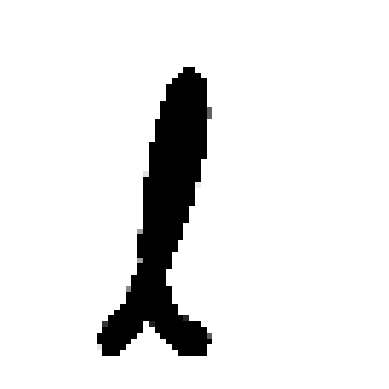

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61]


In [ ]:
print(train_images)
import matplotlib.pyplot as plt

# Supongamos que 'train_images' es un array de imágenes con forma (num_images, height, width, channels)
# y quieres visualizar la primera imagen:

# Seleccionar una imagen
image_to_display = train_images[0]

# Visualizar la imagen
plt.imshow(image_to_display)
plt.axis('off')  # Ocultar los ejes si se desea
plt.show()

etiquetas_unicas = np.unique(test_labels)
print (etiquetas_unicas)


Se crea una red neuronal convolucional secuencial, con capas de convolución, con función de activación `relu` y con pooling máximo. En la última capa se usa la función de activación `softmax` para generar una distribución de probabilidad sebre cada clase.
Despúes se usa como función de pérdida `sparse_categorical_crossentropy` y optimizador `adam`. Usamos 20 épocas en el entrenamiento.

In [ ]:
model = Sequential()
model.add(Conv2D(512,(5,5),activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='sigmoid'))
model.add(Dense(62,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=20, validation_split=0.2)


Epoch 1/20
69/69 [==============================] - 11s 60ms/step - loss: 4.2014 - accuracy: 0.0101 - val_loss: 4.1541 - val_accuracy: 0.0183
Epoch 2/20
69/69 [==============================] - 3s 47ms/step - loss: 4.1725 - accuracy: 0.0101 - val_loss: 4.1731 - val_accuracy: 0.0147
Epoch 3/20
69/69 [==============================] - 3s 46ms/step - loss: 4.0614 - accuracy: 0.0298 - val_loss: 3.6729 - val_accuracy: 0.0769
Epoch 4/20
69/69 [==============================] - 3s 44ms/step - loss: 3.2466 - accuracy: 0.1412 - val_loss: 2.9103 - val_accuracy: 0.1740
Epoch 5/20
69/69 [==============================] - 3s 40ms/step - loss: 2.4712 - accuracy: 0.2988 - val_loss: 2.3447 - val_accuracy: 0.3059
Epoch 6/20
69/69 [==============================] - 3s 38ms/step - loss: 1.8176 - accuracy: 0.4647 - val_loss: 1.7085 - val_accuracy: 0.4817
Epoch 7/20
69/69 [==============================] - 3s 40ms/step - loss: 1.2862 - accuracy: 0.6297 - val_loss: 1.4265 - val_accuracy: 0.5916
Epoch 8/20
6

Se grafica tanto la pérdida como el acierto del modelo en los datos de entrenamiento y en los de validación para poder elegir el número de épocas adecuado.

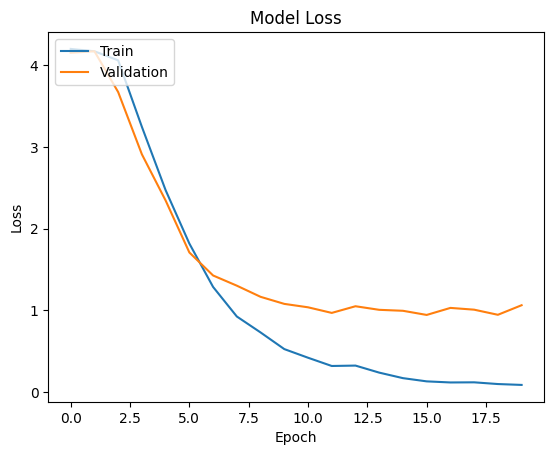

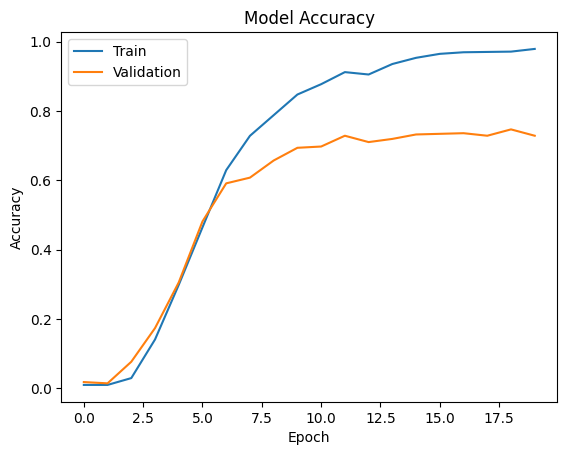

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de pérdida
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Gráfico de precisión
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
model = Sequential()
model.add(Conv2D(512,(5,5),activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='sigmoid'))
model.add(Dense(62,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
69/69 [==============================] - 6s 43ms/step - loss: 4.2077 - accuracy: 0.0156 - val_loss: 4.1870 - val_accuracy: 0.0128
Epoch 2/10
69/69 [==============================] - 3s 40ms/step - loss: 4.1737 - accuracy: 0.0160 - val_loss: 4.1814 - val_accuracy: 0.0092
Epoch 3/10
69/69 [==============================] - 3s 40ms/step - loss: 4.1739 - accuracy: 0.0110 - val_loss: 4.1735 - val_accuracy: 0.0238
Epoch 4/10
69/69 [==============================] - 3s 41ms/step - loss: 3.8213 - accuracy: 0.0632 - val_loss: 3.5208 - val_accuracy: 0.1136
Epoch 5/10
69/69 [==============================] - 3s 41ms/step - loss: 3.0413 - accuracy: 0.1893 - val_loss: 2.6879 - val_accuracy: 0.2692
Epoch 6/10
69/69 [==============================] - 3s 39ms/step - loss: 2.3666 - accuracy: 0.3469 - val_loss: 2.2800 - val_accuracy: 0.3516
Epoch 7/10
69/69 [==============================] - 3s 41ms/step - loss: 1.8573 - accuracy: 0.4702 - val_loss: 1.8673 - val_accuracy: 0.4451
Epoch 8/10
69

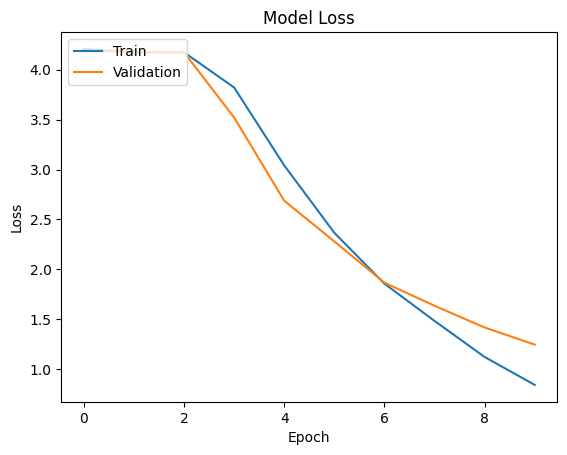

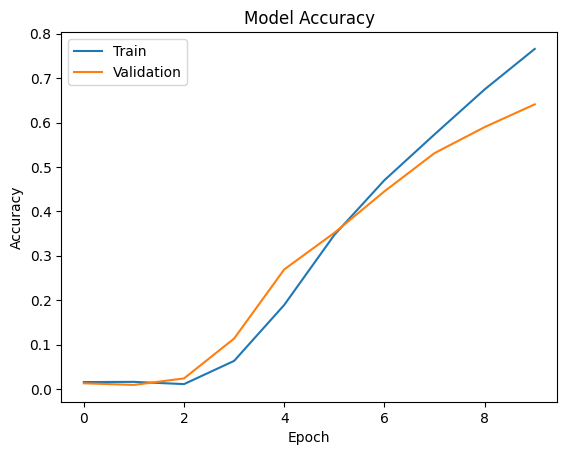

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de pérdida
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Gráfico de precisión
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de prueba:", test_loss)
print("Precisión en el conjunto de prueba:", test_accuracy)


22/22 [==============================] - 1s 27ms/step - loss: 1.2672 - accuracy: 0.6246
Pérdida en el conjunto de prueba: 1.2671961784362793
Precisión en el conjunto de prueba: 0.6246334314346313


In [ ]:

# Realizamos las predicciones sobre los datos de test
predicciones = model.predict(test_images)



22/22 [==============================] - 0s 10ms/step


In [ ]:
# Obtenemos las etiquetas de clase de las predicciones
predicciones_etiquetas = np.argmax(predicciones, axis=1)

from sklearn.metrics import classification_report

# Mostramos las métricas de clasificación
print(classification_report(test_labels, predicciones_etiquetas))




              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.67      0.36      0.47        11
           2       0.83      0.50      0.62        10
           3       0.00      0.00      0.00        20
           4       0.75      0.86      0.80        14
           5       0.46      0.81      0.59        16
           6       0.50      0.78      0.61         9
           7       0.64      0.47      0.54        15
           8       0.54      0.58      0.56        12
           9       0.57      0.73      0.64        11
          10       0.86      0.75      0.80        16
          11       0.80      0.44      0.57         9
          12       0.44      0.44      0.44         9
          13       0.83      1.00      0.91        10
          14       0.79      0.73      0.76        15
          15       1.00      0.71      0.83        14
          16       0.89      0.80      0.84        10
          17       0.82    


------------------------------------------------------------

--> Imagen 42


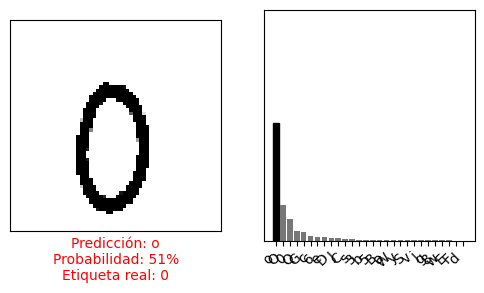







--> Imagen 50


<Figure size 640x480 with 0 Axes>

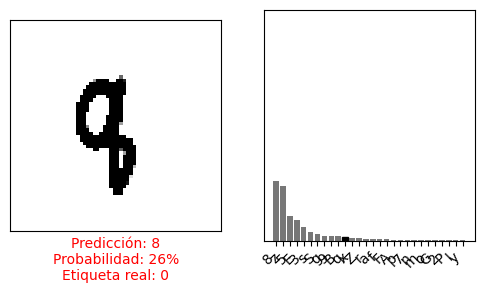







--> Imagen 72


<Figure size 640x480 with 0 Axes>

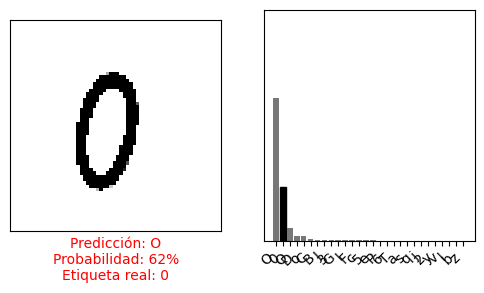







--> Imagen 1


<Figure size 640x480 with 0 Axes>

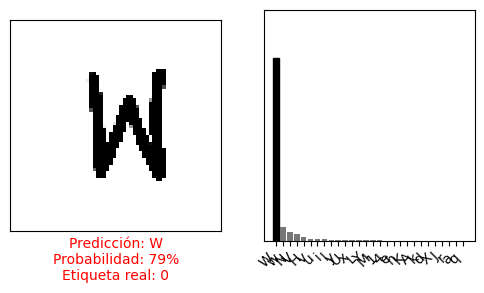







--> Imagen 67


<Figure size 640x480 with 0 Axes>

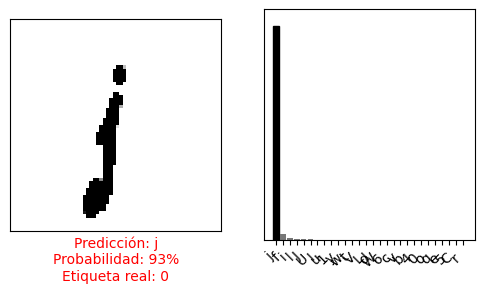







--> Imagen 84


<Figure size 640x480 with 0 Axes>

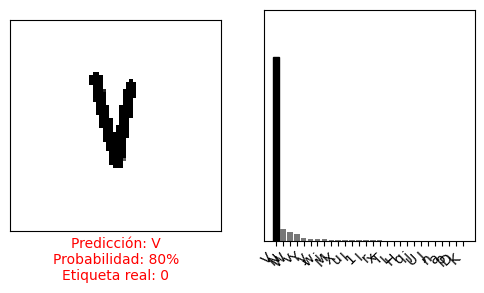







--> Imagen 89


<Figure size 640x480 with 0 Axes>

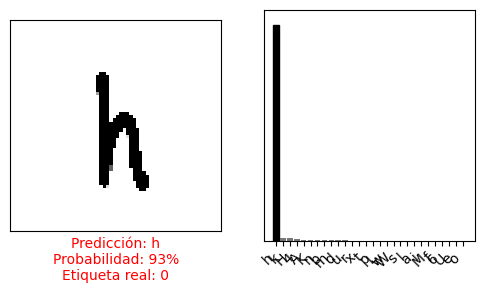







--> Imagen 2


<Figure size 640x480 with 0 Axes>

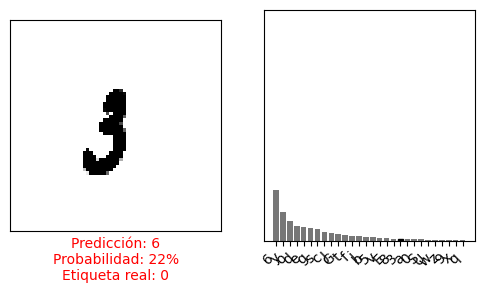







--> Imagen 38


<Figure size 640x480 with 0 Axes>

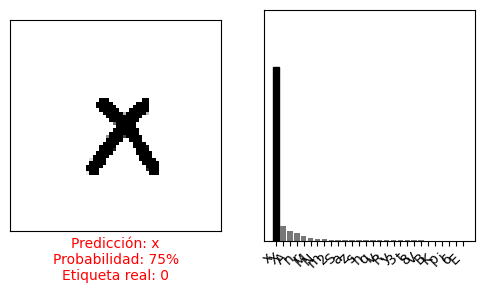







--> Imagen 34


<Figure size 640x480 with 0 Axes>

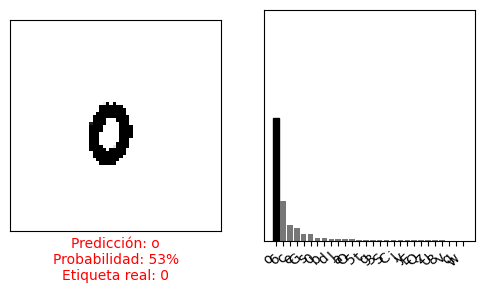

<Figure size 640x480 with 0 Axes>

In [ ]:
# FUNCIONES PARA GRAFICAR PREDICCIONES
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(true_label)

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("Predicción: {}\nProbabilidad: {:2.0f}%\nEtiqueta real: {}".format(clases[predicted_label],
                                          100 * predictions_array[predicted_label],
                                          clases[true_label]),
                                          color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    top_indices = np.argsort(predictions_array)[-28:][::-1]  # Obtén los índices de las mayores probabilidades
    class_labels = [clases[idx] for idx in top_indices]
    plt.xticks(range(28), class_labels, rotation=45, ha='right')  # Ajusta el rango y las etiquetas
    plt.yticks([])
    thisplot = plt.bar(range(28), predictions_array[top_indices], color="#777777")  # Color neutro para todas las barras
    plt.ylim([0, 1])

    # Si la etiqueta real está entre las barras mostradas, resáltala en negro
    if true_label in top_indices:
        real_label_position = np.where(top_indices == true_label)[0][0]  # Encuentra la posición de la etiqueta real
        thisplot[real_label_position].set_color('black')

random_indices = np.random.choice(100, size=10, replace=False)


print('\n' + '-'*60 + '\n')
for i in (random_indices):

  print (f"--> Imagen {i}")
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predicciones[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predicciones[i],  test_labels)
  plt.show()
  plt.clf()
  print('\n''\n')
  print('\n''\n')

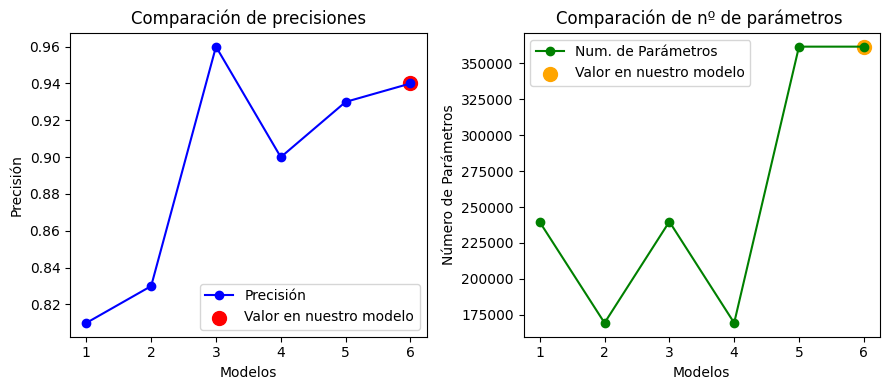

In [ ]:
# Valores recogidos de precisión y nº de parámetros
precisiones = [0.81, 0.83, 0.96, 0.9, 0.93]
num_parametros = [239580, 169308, 239837, 169308, 361692]

fig, axs = plt.subplots(1, 2, figsize=(9, 4))

# GRAFICO DE PRECISION
axs[0].plot(range(1, len(precisiones) + 2), precisiones + [0.94], color='blue', marker='o', label='Precisión')
axs[0].scatter([len(precisiones) + 1], [0.94], color='red', marker='o', label='Valor en nuestro modelo', s=100)
axs[0].set_xlabel('Modelos')
axs[0].set_ylabel('Precisión')
axs[0].set_title('Comparación de precisiones')
axs[0].legend()

# GRÁFICO DEL NÚMERO DE PARÁMETROS
axs[1].plot(range(1, len(num_parametros) + 2), num_parametros + [361692], color='green', marker='o', label='Num. de Parámetros')
axs[1].scatter([len(num_parametros) + 1], [361692], color='orange', marker='o', label='Valor en nuestro modelo', s=100)
axs[1].set_xlabel('Modelos')
axs[1].set_ylabel('Número de Parámetros')
axs[1].set_title('Comparación de nº de parámetros ')
axs[1].legend()

plt.tight_layout()
plt.show()


#### ESTA ES LA DE CLASIFICACION

In [ ]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)



17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
print(train_labels)
train_labels[0] # Crítica positiva


[1 0 0 ... 0 1 0]


1

In [ ]:
# Ningún índice de palabras excederá las 10K palabras porque solo usamos las 10K
# más frecuentes
max([max(sequence) for sequence in train_data])


9999

In [ ]:
# word_index es el diccionario que mapea cada palabra con un ínidice entero
word_index = imdb.get_word_index()
# print(word_index)
# Lo invertimos, asignando índices de enteros a palabras
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# print(reverse_word_index)
# Decodificamos la crítica. Los índices están desviados en 3, porque 0, 1 y 2
# están reservados para "relleno", "inicio de secuencia" y "desconocido"
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])



1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
decoded_review


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Crea matriz de ceros con la forma (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # Pasa índices específicos de results[i] a 1s
    return results

# Datos de entrenamiento vectorizados
x_train = vectorize_sequences(train_data)
# Datos de prueba vectorizados
x_test = vectorize_sequences(test_data)


In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
# Convertimos el vector de etiquetas en un tensor Numpy de coma flotante
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
# Entrada, un tensor con la crítica vectorizada (10000 valores)
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 3s 65ms/step - loss: 0.5479 - acc: 0.7679 - val_loss: 0.4161 - val_acc: 0.8599
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3439 - acc: 0.8880 - val_loss: 0.3248 - val_acc: 0.8788
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2548 - acc: 0.9159 - val_loss: 0.3083 - val_acc: 0.8753
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2059 - acc: 0.9307 - val_loss: 0.2816 - val_acc: 0.8873
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1732 - acc: 0.9411 - val_loss: 0.2762 - val_acc: 0.8884
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1478 - acc: 0.9505 - val_loss: 0.2942 - val_acc: 0.8836
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1282 - acc: 0.9586 - val_loss: 0.2911 - val_acc: 0.8853
Epoch 8/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1119 - a

In [ ]:
history_dict = history.history
history_dict.keys()
print(history_dict['loss'])
print(history_dict['acc'])
print(history_dict['val_loss'])
print(history_dict['val_acc'])


[0.5479341745376587, 0.3438807427883148, 0.254759281873703, 0.20590175688266754, 0.1732475757598877, 0.14779013395309448, 0.12823842465877533, 0.11189340054988861, 0.09787220507860184, 0.08486304432153702, 0.07172683626413345, 0.06320913881063461, 0.057278770953416824, 0.046262919902801514, 0.03937767073512077, 0.03275212645530701, 0.03342849388718605, 0.02648858167231083, 0.021727537736296654, 0.019907165318727493]
[0.7679333090782166, 0.8880000114440918, 0.9158666729927063, 0.930733323097229, 0.9411333203315735, 0.9504666924476624, 0.9585999846458435, 0.9654666781425476, 0.9700000286102295, 0.9757333397865295, 0.9803333282470703, 0.9836666584014893, 0.9845333099365234, 0.9890000224113464, 0.9915333390235901, 0.9940000176429749, 0.9929333329200745, 0.9953333139419556, 0.9967333078384399, 0.9972000122070312]
[0.41611558198928833, 0.32478272914886475, 0.30825579166412354, 0.28160735964775085, 0.2761968672275543, 0.2941761314868927, 0.2911236584186554, 0.30285558104515076, 0.317719519138

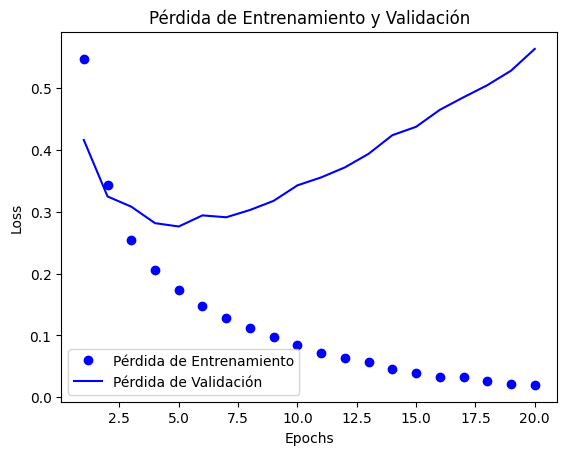

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


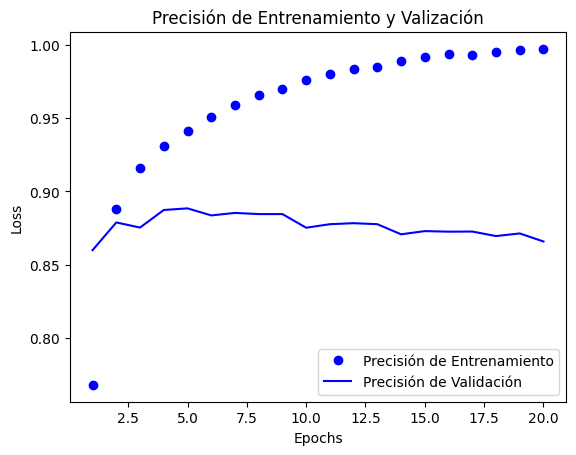

In [ ]:
plt.clf()   # Limpia la figura
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)



Epoch 1/4
49/49 [==============================] - 1s 14ms/step - loss: 0.5290 - accuracy: 0.7748
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.3133 - accuracy: 0.9003
Epoch 3/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2317 - accuracy: 0.9208
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3093 - accuracy: 0.8744


In [ ]:
results


[0.3093394637107849, 0.8743600249290466]

In [ ]:
model.predict(x_test)



782/782 [==============================] - 2s 2ms/step


array([[0.14929822],
       [0.99436367],
       [0.48425388],
       ...,
       [0.05575324],
       [0.04843363],
       [0.27190974]], dtype=float32)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Pérdida con los datos de test:", test_loss)
print("Precisión con los datos de test:", test_acc)